# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 4 - Molecolar Dynamics</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



In questa esercitazione simuleremo la dinamica molecolare di un sistema di $N = 108$ particelle di Argon all'equilibrio termodinamico in fase solida, liquida e gassosa.

Le equazioni del moto dipendono dall'energia potenziale, che è una funzione delle coordinate di ciascun atomo del sistema. Questo rende la soluzione analitica del problema impossibile e le equazioni del moto devono essere risolte numericamente, ad esempio:
- *Algoritmo di Verlet*: in questa esercitazione
- Metodi Montecarlo, come ad esempio l'*algoritmo di Metropolis*: argomento dell'esercitazione 7

In questa esercitazione utilizzeremo le unità ridotte:
- unità di lunghezza $\sigma$
- unità di energia $\epsilon$
- unità di massa $m$
- unità di tempo $\sigma/\sqrt{m/\epsilon}$
- unità di temperatura $\epsilon/k_B$

e considereremo un fluido caratterizzato dal potenziale interatomico di Lenard-Jones
$$
V(r) = 4 \cdot \bigg[\bigg(\frac{1}{r^*}\bigg)^{12} - \bigg(\frac{1}{r^*}\bigg)^6\bigg]
$$
 con $r^* = r/\sigma$

### Algoritmo di Verlet
La strategia generale si basa sulla suddivisione dell'intervallo temporale di interesse $[0,T]$ in $N$ intervalli di ampiezza $\Delta t$, sufficientemente piccoli. 

A partire quindi dagli sviluppi di Taylor:
$$\vec r(t + \delta t) =\vec r (t) + \delta t \vec v(t) + \frac{1}{2}\delta t^2 \vec a(t) + \frac{1}{3!}\delta t^3 \dot {\vec{a}}(t) + O(\delta t^4) $$

$$\vec r(t - \delta t) =\vec r (t) - \delta t \vec v(t) + \frac{1}{2}\delta t^2 \vec a(t) - \frac{1}{3!}\delta t^3 \dot {\vec{a}}(t) + O(\delta t^4)$$
Da cui combinando le due espressioni si ricava
$$
\vec r ( t + \delta t ) \sim 2\vec r ( t ) - \vec r ( t - \delta t ) + \delta t^2 \vec a(t)
$$
Osserviamo che per poter definire la nuova posizione è necessario conoscere $a(t)$, ricavabile dall'espressione del potenziale, calcolando la forza come $\vec F = - \vec {\nabla} V $.  

A partire da questa quantità si può poi ricavare l'espressione per la velocità. 

Si possono allora ricavare le quantità termodinamiche di interesse
- Energia Cinetica $K = \sum_i \frac12 v_i^2$
- Energia Potenziale $V = 4 \sum_i v_i$
- Energia Totale $E = K + V$
- Temperatura $\frac{2}{3N}K$
- Pressione: applicando il teorema del viriale  


$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Raggio di cut-off
In questa esercitazione assumiamo di troncare il potenziale intermolecolare ad un determinato raggio di cutoff $r_{cut}$, considereremo cioè che la maggior parte del contributo del potenziale si ha quando la distanza tra le particelle è minore della distanza data dalla $r_{cut}$

# Esercizio 1
Utilizzando il codice Molecular Dynamics / Monte Carlo (MD_MC) caricato su Ariel per calcolare l'energia interna totale per particella $E/N$, l'energia potenziale per particella $U/N$, l'kinetic energy per particella $K/N$, e a temperatura $T$. ***Includiamo il calcolo della pressione $P$, nel codice Molecular Dynamics code: eseguiamo la media a blocchi, e la media progressiva e l'incertezza progressiva***.


## Soluzione 

Per lo svolgimento dell'esercizio 4.1: all'interno del codice è stato inclusa la stima sulla pressione. In particolare il calcolo è stato incluso all'interno della funzione Measure

A titolo di Esempio riportiamo di seguito le quantità calcolate dal codice, nel caso in cui il sistema si trovi in fase  gassosa.



In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [40]:
#Loading of values form files 
x_etot, stima_etot , prog_av_etot, error_etot = np.loadtxt("Esercizio 4.1/Gas/output_etot.dat", usecols=(0,1,2,3), unpack='true')
x_ekin, stima_ekin , prog_av_ekin, error_ekin = np.loadtxt("Esercizio 4.1/Gas/output_ekin.dat", usecols=(0,1,2,3), unpack='true')
x_epot, stima_epot , prog_av_epot, error_epot = np.loadtxt("Esercizio 4.1/Gas/output_epot.dat", usecols=(0,1,2,3), unpack='true')
x_temp, stima_temp , prog_av_temp, error_temp = np.loadtxt("Esercizio 4.1/Gas/output_temp.dat", usecols=(0,1,2,3), unpack='true')
x_pres, stima_pres , prog_av_pres, error_pres = np.loadtxt("Esercizio 4.1/Gas/output_pres.dat", usecols=(0,1,2,3), unpack='true')

In [41]:
colors = {'etot':'#432534','epot':'#c20114', 'ekin': '#d282a6', 'pres': '#048ba8', 'temp': '#f59700' }

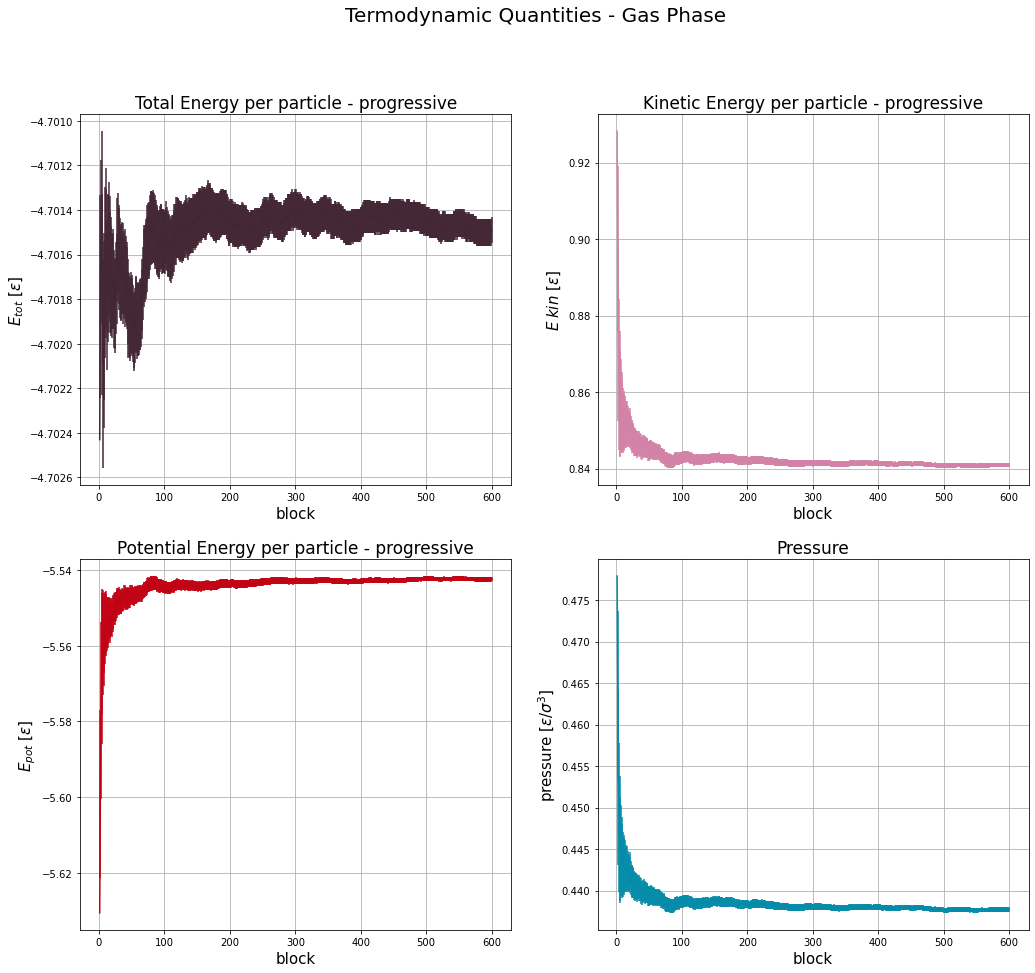

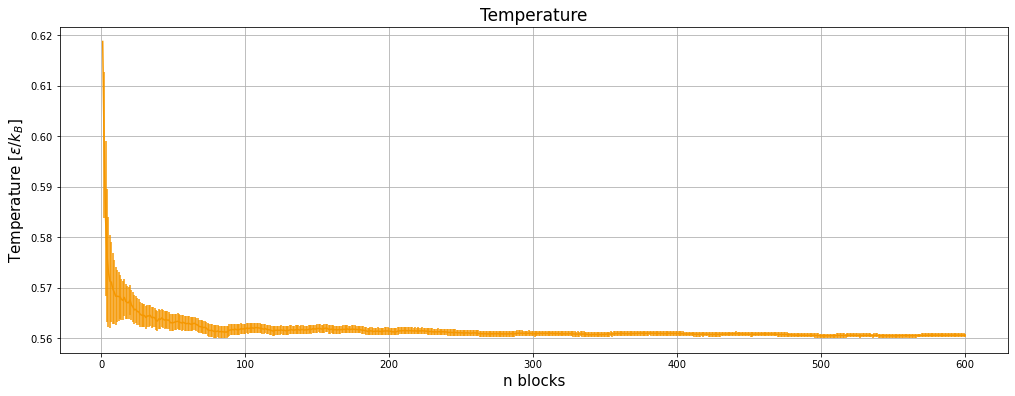

In [42]:
#fig, ((etot, ekin), (epot, temp), (pres)) = plt.subplots(3, 2)
fig, ((etot, ekin), (epot, pres)) = plt.subplots(2, 2,sharex=False, figsize=[17, 15 ])
fig.suptitle('Termodynamic Quantities - Gas Phase ', fontsize = 20)

etot.errorbar(x_etot,prog_av_etot,yerr=error_etot, color = colors ['etot'])
etot.set_title("Total Energy per particle - progressive", fontsize = 17)
etot.set_xlabel('block', fontsize = 15)
etot.set_ylabel('$E_{tot}$ [$\epsilon$]', fontsize = 15)
etot.grid()

ekin.errorbar(x_ekin,prog_av_ekin,yerr=error_ekin, color = colors ['ekin'])
ekin.set_title("Kinetic Energy per particle - progressive", fontsize = 17)
ekin.set_xlabel('block', fontsize = 15)
ekin.set_ylabel('$E_ {kin}$ [$\epsilon$]', fontsize = 15)
ekin.grid()

epot.errorbar(x_epot,prog_av_epot,yerr=error_epot, color = colors ['epot'])
epot.set_title("Potential Energy per particle - progressive", fontsize = 17)
epot.set_xlabel('block', fontsize = 15)
epot.set_ylabel('$E_{pot}$ [$\epsilon$]', fontsize = 15)
epot.grid()

pres.errorbar(x_pres,prog_av_pres,yerr=error_pres, color = colors ['pres'])
pres.set_title("Pressure", fontsize = 17)
pres.set_xlabel('block', fontsize = 15)
pres.set_ylabel("pressure [$\epsilon / \sigma^3 $]", fontsize = 15)
pres.grid()

fig, temp = plt.subplots(1, 1, figsize=[17, 6 ])
temp.errorbar(x_temp,prog_av_temp,yerr=error_temp, color = colors ['temp'])
temp.set_title("Temperature", fontsize = 17)
temp.set_xlabel('n blocks', fontsize = 15)
temp.set_ylabel('Temperature [$\epsilon/k_B$]', fontsize = 15)
temp.grid()

## Commentiamo i grafici ottenuti: 
In questo primo esercizio sono state calcolate le prime quantità termodinamiche. 
Quello che si osserva è che:
- l'energia totale del sistema tende a mantenersi costante, come atteso, avendo un andamento iniziale oscillante. 
- L'energia cinetica del sistema tende a dimunuire ed a raggiungere un valore costante
- L'energia potenziale del sistema tende ad aumentare e a raggiungere un valore costante 
- La temperatura ha un andamento qualitativamente assimilabile all'andamento dell'energia cinetica. Questo è un andamento 
### Osservazioni sul grafico della temperatura - Termalizzazione 
A partire da questi grafici preliminari osserviamo che l'andamento della temperatura non tende al valore di temperatura di input $T_0 = 1.1$, ma tende a un valore minore. Emerge da questa prima osservazione che per fare in modo che il sistema lavoro alla temperatura di input indicata, è necessario attendere che il sistema venga equilibrato e determinare il valore di temperatura iniziale tale che dopo un certo numero di step (equilibration time) raggiunga la temperatura desiderata. 

# Esercizio 2
Per migliorare il codice performiamo una simulazione MD tramite un modello Lennard-Jones di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni: 
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

e mostrare un grafico dei valori di media progressiva e la rispettiva incertezza come funzione del numero di blocchi delle quantità l'energia interna totale per particella $E/N$, l'energia potenziale per particella $U/N$, l'kinetic energy per particella $K/N$, e a temperatura $T$ in unità ridotte. 

## Soluzione 

Simuliamo il nostro sistema nelle diverse condizioni. 
Come osservato nel punto presedente, è necessario che il sistema sia prima equilibrato. 
Per ciascuna fase indicata, mostriamo inizialmente l'andamento della temperatura nella situazione iniziale, cioè prima di modificare il valore di temperatura iniziale, quindi mostriamo il grafico della temperatura finale, dopo che si sono attuate le modifiche del caso. Procediamo quindi con l'esercizio, mostrando l'andamento delle quantità termodinamiche richieste. 

## Solid phase

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [44]:
x, stima_temp , prog_av_temp, error_temp = np.loadtxt("Esercizio 4.2/output_temp_solid.dat", usecols=(0,1,2,3),unpack='true') 
x_0, stima_temp_0 , prog_av_temp_0, error_temp_0 = np.loadtxt("Esercizio 4.1/Solid/output_temp.dat", usecols=(0,1,2,3),unpack='true')

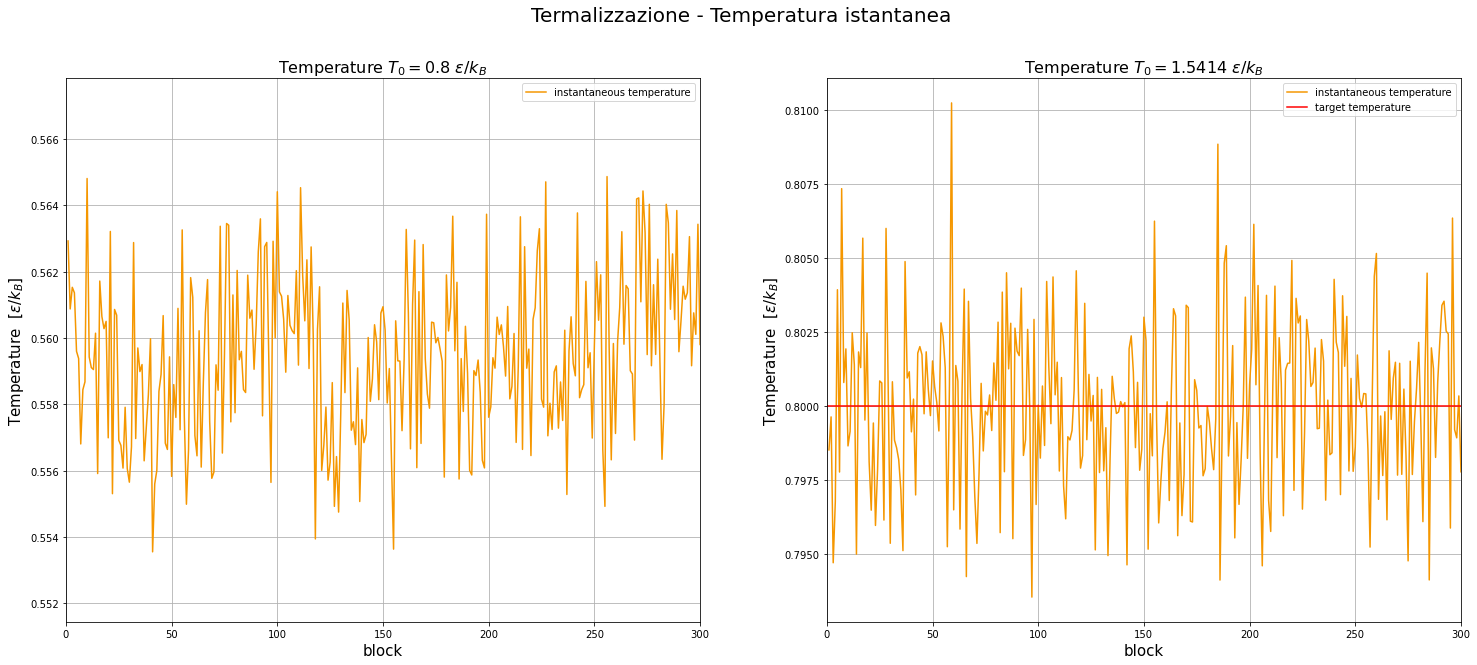

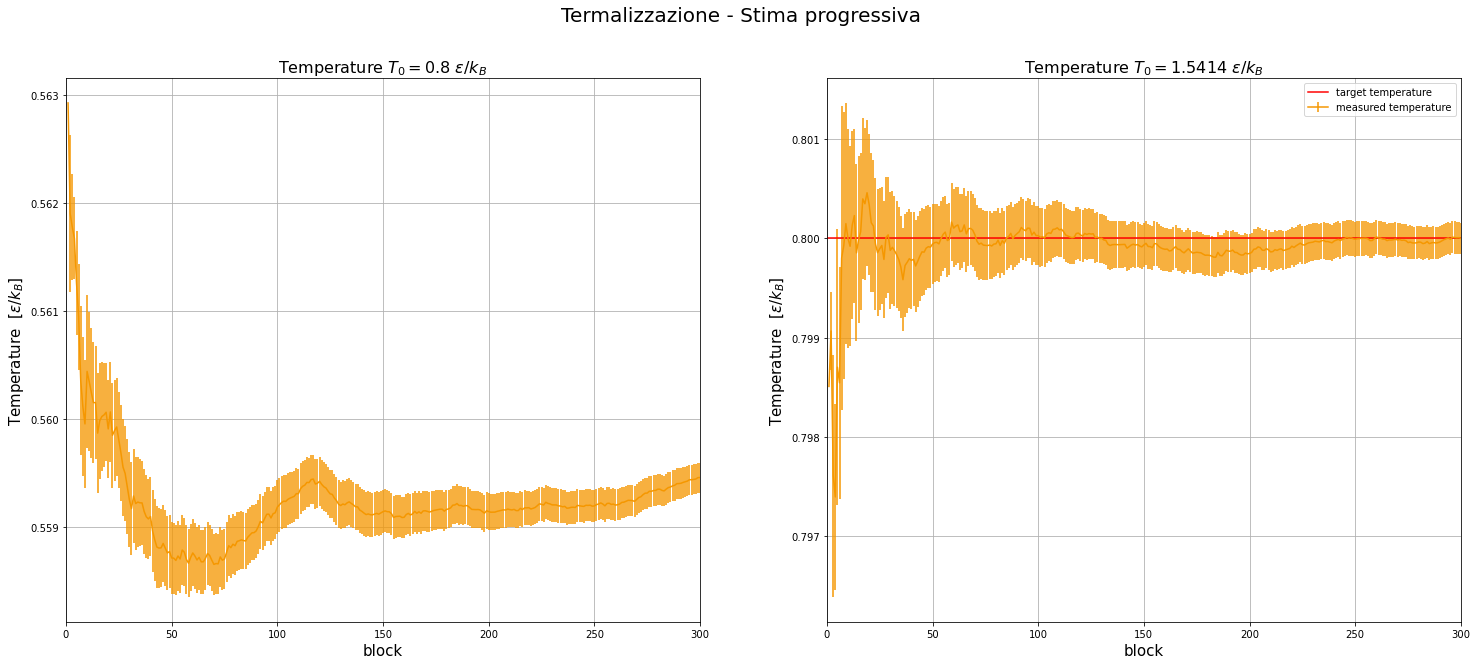

In [45]:
### Temperature plot - istantanea 
fig, (temp_0,temp ) = plt.subplots(1, 2,sharex=True, figsize=[25, 10 ])
fig.suptitle('Termalizzazione - Temperatura istantanea', fontsize = 20)
temp.plot(x,stima_temp, color=colors ['temp'], label = 'instantaneous temperature')
temp.axhline(y=0.8, xmin=0, xmax=300, color = 'red' ,  label = 'target temperature')
temp.set_title("Temperature $T_0 = 1.5414\,\,  \epsilon/k_B$", fontsize = 16)
temp.set_xlabel('block', fontsize = 15)
temp.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp.legend()
temp.grid()

temp_0.plot(x_0,stima_temp_0, color=colors ['temp'], label = 'instantaneous temperature')
#temp_0.axhline(y=0.8, xmin=0, xmax=200, color = 'red' )
temp_0.set_xlim(0, 300)
temp_0.set_title("Temperature $T_0 =0.8\,\,  \epsilon/k_B$", fontsize = 16)
temp_0.set_xlabel('block', fontsize = 15)
temp_0.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp_0.legend()
temp_0.grid()
### Temperature plot - progressive 
fig, (temp_0,temp ) = plt.subplots(1, 2,sharex=True, figsize=[25, 10 ])
fig.suptitle('Termalizzazione - Stima progressiva', fontsize = 20)
temp.errorbar(x,prog_av_temp,yerr=error_temp, color=colors ['temp'], label ='measured temperature')
temp.axhline(y=0.8, xmin=0, xmax=300, color = 'red' ,  label = 'target temperature')
temp.set_title("Temperature $T_0 = 1.5414\,\,  \epsilon/k_B$", fontsize = 16)
temp.set_xlabel('block', fontsize = 15)
temp.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp.legend()
temp.grid()

temp_0.errorbar(x_0,prog_av_temp_0,yerr=error_temp_0, color=colors ['temp'], xuplims=300, label = 'measured temperature')
#temp_0.axhline(y=0.8, xmin=0, xmax=200, color = 'red' )
temp_0.set_xlim(0, 300)
temp_0.set_title("Temperature $T_0 =0.8 \,\,  \epsilon/k_B$", fontsize = 16)
temp_0.set_xlabel('block', fontsize = 15)
temp_0.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp_0.grid()

Dal secondo grafico vediamo che il sistema risulta equilibrato alla temperatura di lavoro di 0.8, avendo fatto equlibrare il sistema a partire da una temperatura iniziale di 1.5414. 

Calcoliamo quindi le quantità termodinamiche utilizzando il metodo della media a blocchi su $N = 300$ blocchi da $L = 2000$ steps

In [46]:
#Loading of values form files 
x_etot_solid, stima_etot_solid , prog_av_etot_solid, error_etot_solid = np.loadtxt("Esercizio 4.2/output_etot_solid.dat", usecols=(0,1,2,3), unpack='true')
x_ekin_solid, stima_ekin_solid , prog_av_ekin_solid, error_ekin_solid = np.loadtxt("Esercizio 4.2/output_ekin_solid.dat", usecols=(0,1,2,3), unpack='true')
x_epot_solid, stima_epot_solid , prog_av_epot_solid, error_epot_solid = np.loadtxt("Esercizio 4.2/output_epot_solid.dat", usecols=(0,1,2,3), unpack='true')
x_pres_solid, stima_pres_solid , prog_av_pres_solid, error_pres_solid = np.loadtxt("Esercizio 4.2/output_pres_solid.dat", usecols=(0,1,2,3), unpack='true')

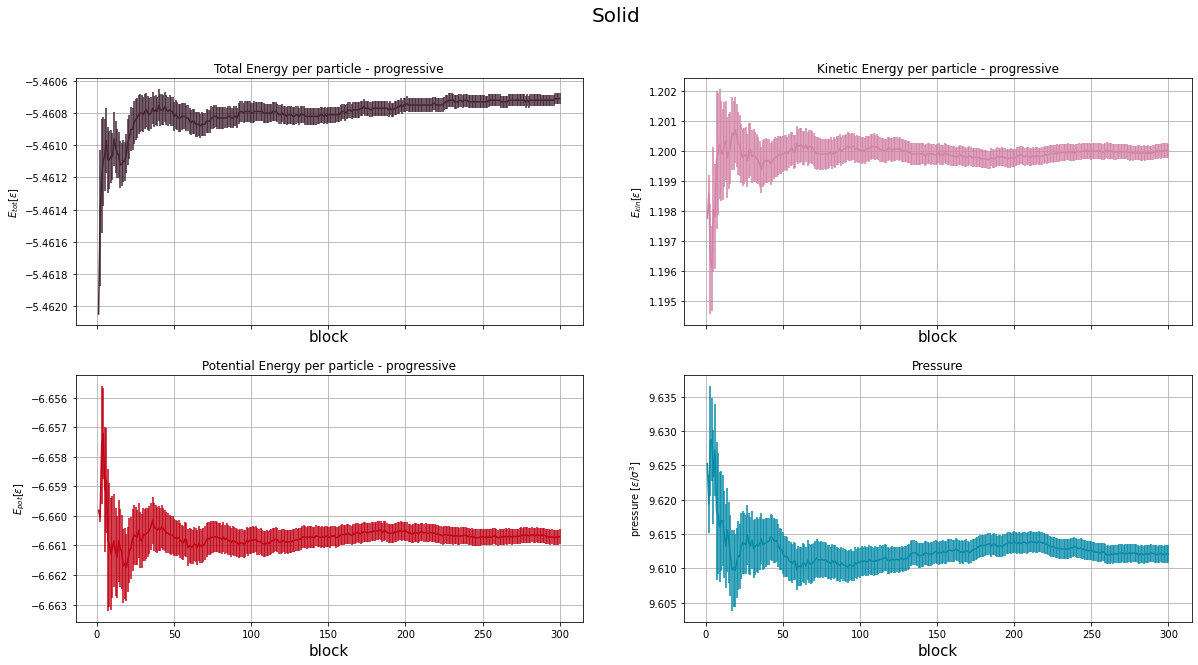

In [47]:
#fig, ((etot, ekin), (epot, temp), (pres)) = plt.subplots(3, 2)
fig, ((etot_solid, ekin_solid), (epot_solid, pres_solid)) = plt.subplots(2,2,sharex=True, figsize=[20, 10])
#fig.WindowState = 'maximized';
#fig, ax = plt.subplots(3, 2)
fig.suptitle('Solid', fontsize = 20)

etot_solid.errorbar(x_etot_solid,prog_av_etot_solid,yerr=error_etot_solid, color = colors['etot'])
etot_solid.set_title("Total Energy per particle - progressive")
etot_solid.set_xlabel('block', fontsize = 15)
etot_solid.set_ylabel('$E_{tot} [\epsilon$]')
etot_solid.grid()

ekin_solid.errorbar(x_ekin_solid,prog_av_ekin_solid,yerr=error_ekin_solid, color = colors['ekin'])
ekin_solid.set_title("Kinetic Energy per particle - progressive")
ekin_solid.set_xlabel('block', fontsize = 15)
ekin_solid.set_ylabel('$E_{kin} [\epsilon$]')
ekin_solid.grid()

epot_solid.errorbar(x_epot_solid,prog_av_epot_solid,yerr=error_epot_solid, color = colors['epot'])
epot_solid.set_title("Potential Energy per particle - progressive")
epot_solid.set_xlabel('block', fontsize = 15)
epot_solid.set_ylabel('$E_{pot} [\epsilon$]')
epot_solid.grid()

pres_solid.errorbar(x_pres_solid,prog_av_pres_solid,yerr=error_pres_solid, color = colors['pres'])
pres_solid.set_title("Pressure")
pres_solid.set_xlabel('block', fontsize = 15)
pres_solid.set_ylabel("pressure [$\epsilon / \sigma^3 $]")
pres_solid.grid()


## Liquid phase


Vogliamo far convergere la temperatura a $T = 1.1 \epsilon/k_B$. Da una prima stima, valutiamo che la temperatura converge ad un valore intorno a $T = 0.6  \epsilon/k_B$. 


In [48]:
x, stima_temp , prog_av_temp, error_temp = np.loadtxt("Esercizio 4.2/output_temp_liquid.dat", usecols=(0,1,2,3),unpack='true') 
x_0, stima_temp_0 , prog_av_temp_0, error_temp_0 = np.loadtxt("Esercizio 4.1/Liquid/output_temp.dat", usecols=(0,1,2,3),unpack='true')

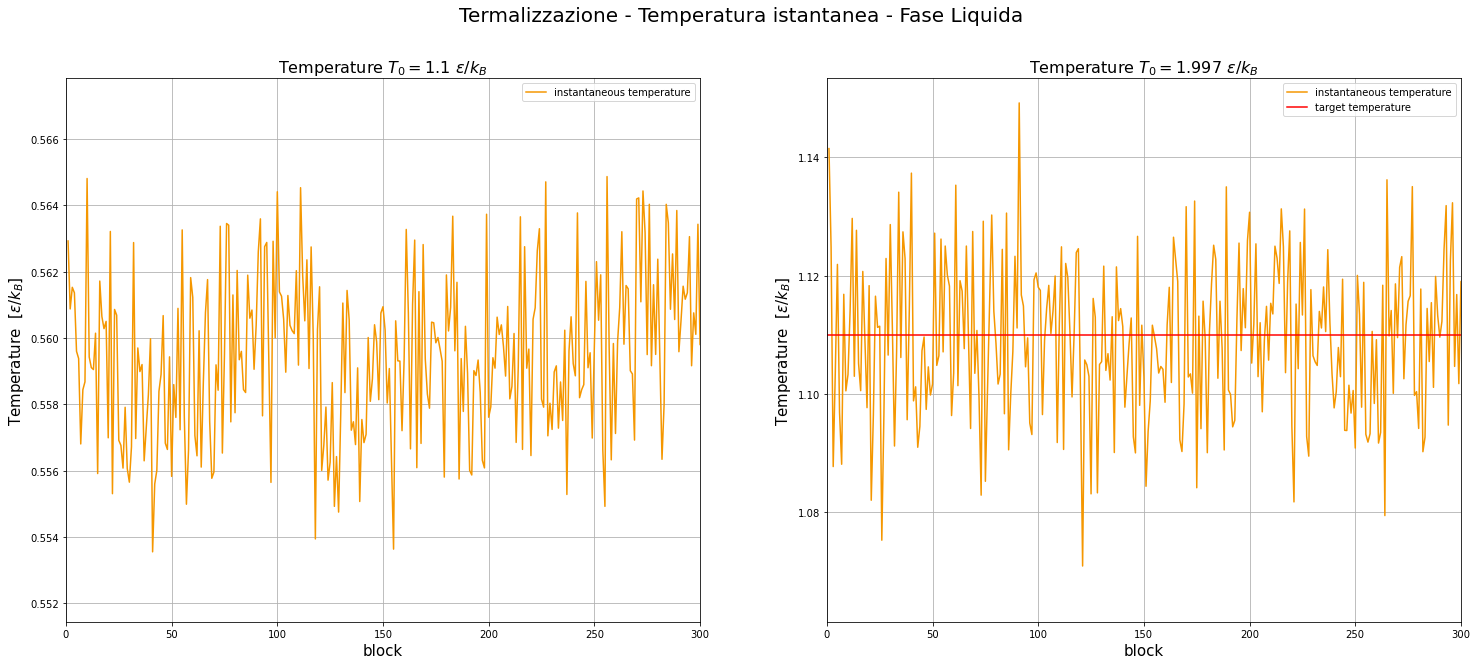

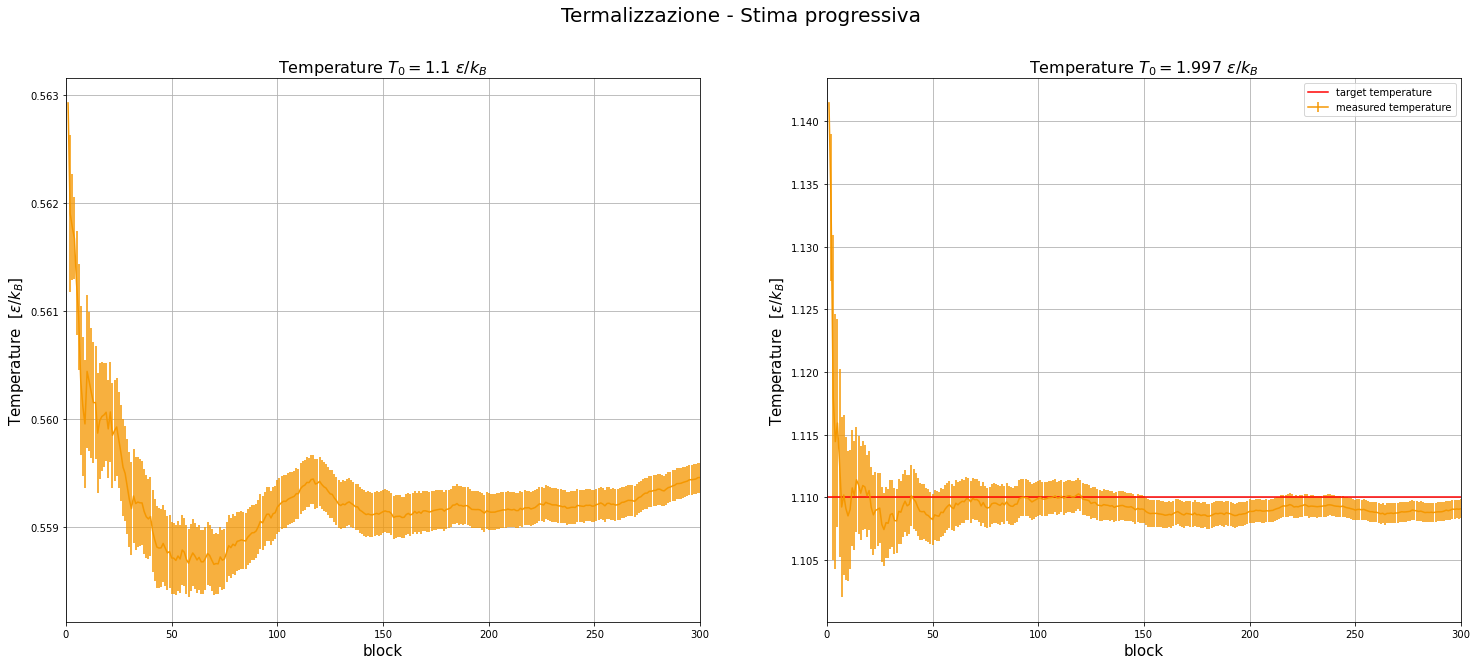

In [49]:
### Temperature plot - istantanea 
fig, (temp_0,temp ) = plt.subplots(1, 2,sharex=True, figsize=[25, 10 ])
fig.suptitle('Termalizzazione - Temperatura istantanea - Fase Liquida', fontsize = 20)
temp.plot(x,stima_temp, color=colors ['temp'], label = 'instantaneous temperature')
temp.axhline(y=1.11, xmin=0, xmax=300, color = 'red' ,  label = 'target temperature')
temp.set_title("Temperature $T_0 = 1.997\,\,  \epsilon/k_B$", fontsize = 16)
temp.set_xlabel('block', fontsize = 15)
temp.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp.legend()
temp.grid()

temp_0.plot(x_0,stima_temp_0, color=colors ['temp'], label = 'instantaneous temperature')
#temp_0.axhline(y=0.8, xmin=0, xmax=200, color = 'red' )
temp_0.set_xlim(0, 300)
temp_0.set_title("Temperature $T_0 = 1.1\,\,  \epsilon/k_B$", fontsize = 16)
temp_0.set_xlabel('block', fontsize = 15)
temp_0.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp_0.legend()
temp_0.grid()
### Temperature plot - progressive 
fig, (temp_0,temp ) = plt.subplots(1, 2,sharex=True, figsize=[25, 10 ])
fig.suptitle('Termalizzazione - Stima progressiva', fontsize = 20)
temp.errorbar(x,prog_av_temp,yerr=error_temp, color=colors ['temp'], label ='measured temperature')
temp.axhline(y=1.11, xmin=0, xmax=300, color = 'red' ,  label = 'target temperature')
temp.set_title("Temperature $T_0 = 1.997\,\,  \epsilon/k_B$", fontsize = 16)
temp.set_xlabel('block', fontsize = 15)
temp.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp.legend()
temp.grid()

temp_0.errorbar(x_0,prog_av_temp_0,yerr=error_temp_0, color=colors ['temp'], xuplims=300, label = 'measured temperature')
#temp_0.axhline(y=0.8, xmin=0, xmax=200, color = 'red' )
temp_0.set_xlim(0, 300)
temp_0.set_title("Temperature $T_0 = 1.1\,\,  \epsilon/k_B$", fontsize = 16)
temp_0.set_xlabel('block', fontsize = 15)
temp_0.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp_0.grid()

Valutiamo che impostando la temperatura iniziale del sistema a $1.997 \epsilon/k_B $, il sistema stesso evolve stabilizzandosi intorno alla temperatura desiderata di $T = 1.1 \,\epsilon/k_B$

Calcoliamo quindi le quantità termodinamiche utilizzando il metodo della media a blocchi su $N = 600$ blocchi da $L = 2000$ steps

In [50]:
#Loading of values form files 
x_etot_liquid, stima_etot_liquid , prog_av_etot_liquid, error_etot_liquid = np.loadtxt("Esercizio 4.2/output_etot_liquid.dat", usecols=(0,1,2,3), unpack='true')
x_ekin_liquid, stima_ekin_liquid , prog_av_ekin_liquid, error_ekin_liquid = np.loadtxt("Esercizio 4.2/output_ekin_liquid.dat", usecols=(0,1,2,3), unpack='true')
x_epot_liquid, stima_epot_liquid , prog_av_epot_liquid, error_epot_liquid = np.loadtxt("Esercizio 4.2/output_epot_liquid.dat", usecols=(0,1,2,3), unpack='true')
x_pres_liquid, stima_pres_liquid , prog_av_pres_liquid, error_pres_liquid = np.loadtxt("Esercizio 4.2/output_pres_liquid.dat", usecols=(0,1,2,3), unpack='true')

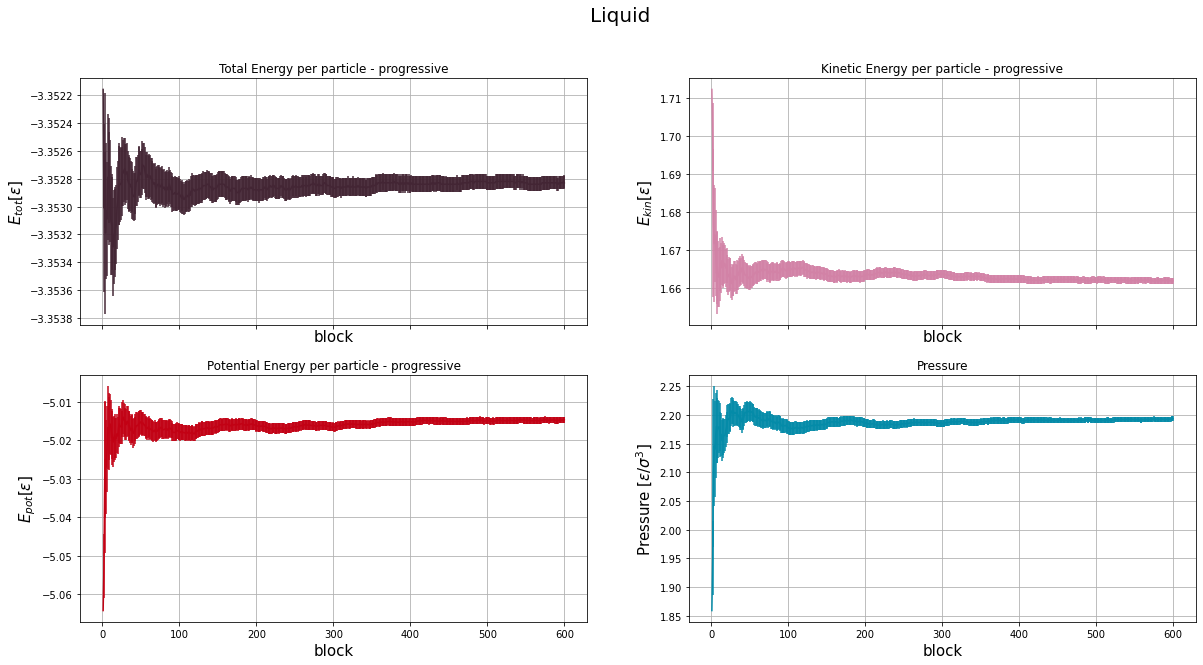

In [52]:
#fig, ((etot, ekin), (epot, temp), (pres)) = plt.subplots(3, 2)
fig, ((etot_liquid, ekin_liquid), (epot_liquid, pres_liquid)) = plt.subplots(2,2,sharex=True, figsize=[20, 10])
#fig.WindowState = 'maximized';
#fig, ax = plt.subplots(3, 2)
fig.suptitle('Liquid', fontsize = 20)

etot_liquid.errorbar(x_etot_liquid,prog_av_etot_liquid,yerr=error_etot_liquid, color = colors['etot'])
etot_liquid.set_title("Total Energy per particle - progressive")
etot_liquid.set_xlabel('block', fontsize = 15 ) 
etot_liquid.set_ylabel('$E_{tot} [\epsilon$]', fontsize = 15)
etot_liquid.grid()

ekin_liquid.errorbar(x_ekin_liquid,prog_av_ekin_liquid,yerr=error_ekin_liquid, color = colors['ekin'])
ekin_liquid.set_title("Kinetic Energy per particle - progressive")
ekin_liquid.set_xlabel('block', fontsize = 15 ) 
ekin_liquid.set_ylabel('$E_{kin} [\epsilon$]', fontsize = 15)
ekin_liquid.grid()

epot_liquid.errorbar(x_epot_liquid,prog_av_epot_liquid,yerr=error_epot_liquid, color = colors['epot'])
epot_liquid.set_title("Potential Energy per particle - progressive")
epot_liquid.set_xlabel('block', fontsize = 15 ) 
epot_liquid.set_ylabel('$E_{pot} [\epsilon$]', fontsize = 15)
epot_liquid.grid()

pres_liquid.errorbar(x_pres_liquid,prog_av_pres_liquid,yerr=error_pres_liquid, color = colors['pres'])
pres_liquid.set_title("Pressure")
pres_liquid.set_xlabel('block', fontsize = 15 ) 
pres_liquid.set_ylabel("Pressure [$\epsilon / \sigma^3 $]", fontsize = 15)
pres_liquid.grid()


## Gas phase

Vogliamo far convergere la temperatura a $T = 1.2 \epsilon/k_B$. Da una prima stima, valutiamo che la temperatura converge ad un valore intorno a $T = 0.56 \epsilon/k_B$. 
Valutiamo che impostando la temperatura iniziale del sistema a $2.141 \epsilon/k_B $, il sistema stesso evolve stabilizzandosi intorno alla temperatura desiderata di $T = 1.2 \,\epsilon/k_B$

In [53]:
x, stima_temp , prog_av_temp, error_temp = np.loadtxt("Esercizio 4.2/output_temp_gas.dat", usecols=(0,1,2,3),unpack='true') 
x_0, stima_temp_0 , prog_av_temp_0, error_temp_0 = np.loadtxt("Esercizio 4.1/Gas/output_temp.dat", usecols=(0,1,2,3),unpack='true')

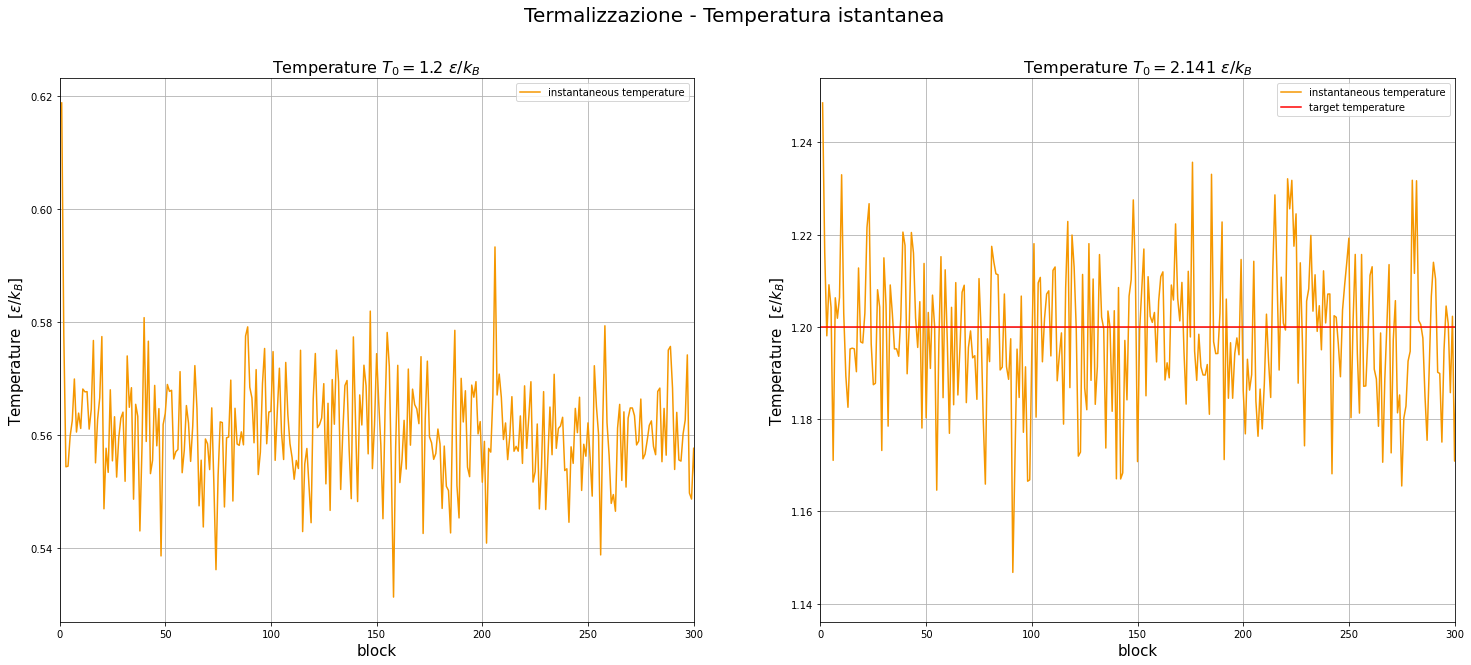

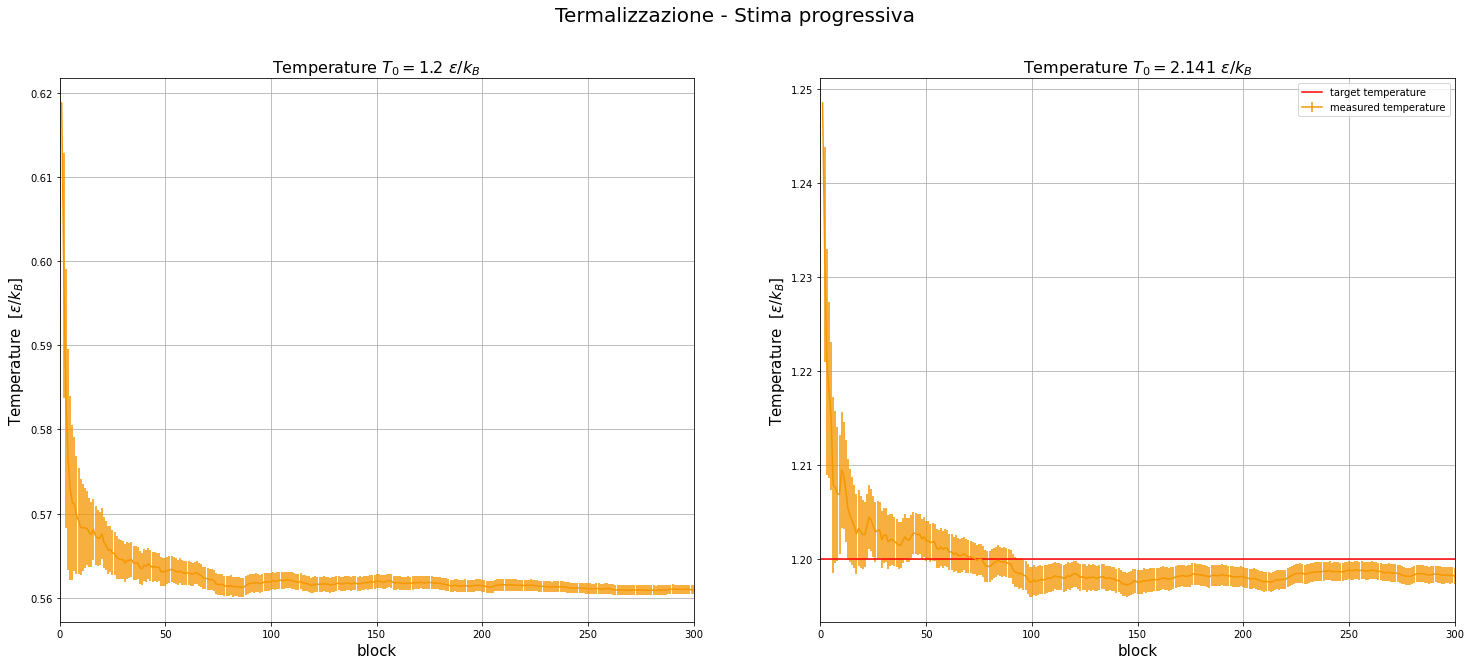

In [54]:
### Temperature plot - istantanea 
fig, (temp_0,temp ) = plt.subplots(1, 2,sharex=True, figsize=[25, 10 ])

fig.suptitle('Termalizzazione - Temperatura istantanea', fontsize = 20)
temp.plot(x,stima_temp, color=colors ['temp'], label = 'instantaneous temperature')
temp.axhline(y=1.2, xmin=0, xmax=300, color = 'red' ,  label = 'target temperature')
temp.set_title("Temperature $T_0 = 2.141\,\,  \epsilon/k_B$", fontsize = 16)
temp.set_xlabel('block', fontsize = 15)
temp.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp.legend()
temp.grid()

temp_0.plot(x_0,stima_temp_0, color=colors ['temp'], label = 'instantaneous temperature')
#temp_0.axhline(y=0.8, xmin=0, xmax=200, color = 'red' )
temp_0.set_xlim(0, 300)
temp_0.set_title("Temperature $T_0 = 1.2\,\,  \epsilon/k_B$", fontsize = 16)
temp_0.set_xlabel('block', fontsize = 15)
temp_0.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp_0.legend()
temp_0.grid()
### Temperature plot - progressive 
fig, (temp_0,temp ) = plt.subplots(1, 2,sharex=True, figsize=[25, 10 ])
fig.suptitle('Termalizzazione - Stima progressiva', fontsize = 20)
temp.errorbar(x,prog_av_temp,yerr=error_temp, color=colors ['temp'], label ='measured temperature')
temp.axhline(y=1.2, xmin=0, xmax=300, color = 'red' ,  label = 'target temperature')
temp.set_title("Temperature $T_0 = 2.141\,\,  \epsilon/k_B$", fontsize = 16)
temp.set_xlabel('block', fontsize = 15)
temp.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp.legend()
temp.grid()

temp_0.errorbar(x_0,prog_av_temp_0,yerr=error_temp_0, color=colors ['temp'], xuplims=300, label = 'measured temperature')
#temp_0.axhline(y=0.8, xmin=0, xmax=200, color = 'red' )
temp_0.set_xlim(0, 300)
temp_0.set_title("Temperature $T_0 = 1.2\,\,  \epsilon/k_B$", fontsize = 16)
temp_0.set_xlabel('block', fontsize = 15)
temp_0.set_ylabel('Temperature  [$\epsilon/k_B$]', fontsize = 15)
temp_0.grid()



Dal secondo grafico vediamo che il sistema risulta equilibrato alla temperatura di lavoro di 1.2, avendo fatto equlibrare il sistema a partire da una temperatura iniziale di 2.141. 

Calcoliamo quindi le quantità termodinamiche utilizzando il metodo della media a blocchi su $N = 600$ blocchi da $L = 2000$ steps

In [55]:
#Loading of values form files 
x_etot_gas, stima_etot_gas , prog_av_etot_gas, error_etot_gas = np.loadtxt("Esercizio 4.2/output_etot_gas.dat", usecols=(0,1,2,3), unpack='true')
x_ekin_gas, stima_ekin_gas , prog_av_ekin_gas, error_ekin_gas = np.loadtxt("Esercizio 4.2/output_ekin_gas.dat", usecols=(0,1,2,3), unpack='true')
x_epot_gas, stima_epot_gas , prog_av_epot_gas, error_epot_gas = np.loadtxt("Esercizio 4.2/output_epot_gas.dat", usecols=(0,1,2,3), unpack='true')
x_pres_gas, stima_pres_gas , prog_av_pres_gas, error_pres_gas = np.loadtxt("Esercizio 4.2/output_pres_gas.dat", usecols=(0,1,2,3), unpack='true')

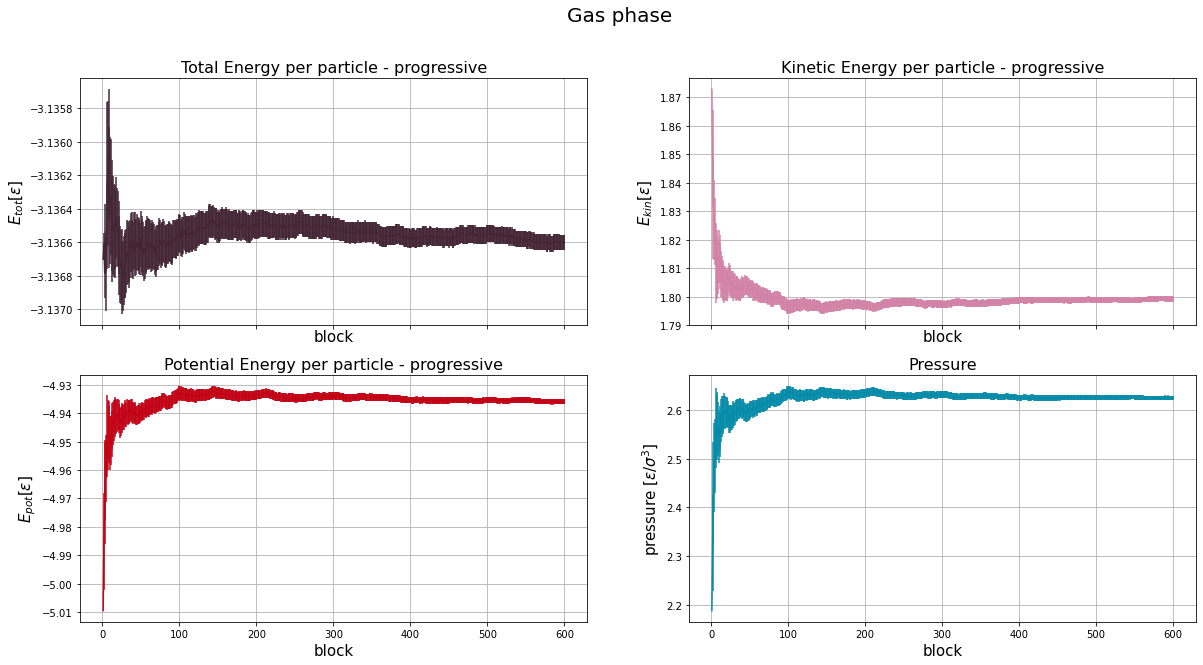

In [56]:
#fig, ((etot, ekin), (epot, temp), (pres)) = plt.subplots(3, 2)
fig, ((etot_gas, ekin_gas), (epot_gas, pres_gas)) = plt.subplots(2,2,sharex=True, figsize=[20, 10])
#fig.WindowState = 'maximized';
#fig, ax = plt.subplots(3, 2)
fig.suptitle('Gas phase', fontsize = 20)

etot_gas.errorbar(x_etot_gas,prog_av_etot_gas,yerr=error_etot_gas, color = colors['etot'])
etot_gas.set_title("Total Energy per particle - progressive", fontsize = 16)
etot_gas.set_xlabel('block', fontsize = 15 ) 
etot_gas.set_ylabel('$E_{tot} [\epsilon$]', fontsize = 15)
etot_gas.grid()

ekin_gas.errorbar(x_ekin_gas,prog_av_ekin_gas,yerr=error_ekin_gas, color = colors['ekin'])
ekin_gas.set_title("Kinetic Energy per particle - progressive", fontsize = 16)
ekin_gas.set_xlabel('block', fontsize = 15 ) 
ekin_gas.set_ylabel('$E_{kin} [\epsilon$]', fontsize = 15)
ekin_gas.grid()

epot_gas.errorbar(x_epot_gas,prog_av_epot_gas,yerr=error_epot_gas, color = colors['epot'])
epot_gas.set_title("Potential Energy per particle - progressive", fontsize = 16)
epot_gas.set_xlabel('block', fontsize = 15 ) 
epot_gas.set_ylabel('$E_{pot} [\epsilon$]', fontsize = 15)
epot_gas.grid()

pres_gas.errorbar(x_pres_gas,prog_av_pres_gas,yerr=error_pres_gas, color = colors['pres'])
pres_gas.set_title("Pressure", fontsize = 16)
pres_gas.set_xlabel('block', fontsize = 15 ) 
pres_gas.set_ylabel("pressure [$\epsilon / \sigma^3 $]", fontsize = 15)
pres_gas.grid()


## Commenti Esercizio 2 

Facciamo alcune osservazioni sui risultati trovati. 

Il programma di dinamica molecolare calcola la nuova posizione delle molecole risolvendo le equazioni del moto. 
Osserviamo che durante l'evoluzione il sistema mantiene costante l'energia totale. Si può apprezzare questo fatto in tutte le fasi. 

